# Event generator and Event receiver

## 1. Devices
- Xilinx ZC706 Evaluation Board[1]
- PmodGPS
- Single mode fiber
- PC (USPAS2)

##     2. Firmware and software
**a. The fpga firmware code is available at [github](https://gitlab.lbl.gov/ghuang/tinyevgevr) The core functional module are:**
    
    i. tinyEVG.v
    ii. tinyEVR.v

##      3. Instruction
In this experiment, you will run a tiny open source version of event generator and event receiver on a Xilinx evaluation board. By study the core module of the firmware, understand how the EVG/EVR works as a timing system. Then as an exercise, write a module of your own to implement some function.

The ZC706 evaluation board carry Zynq-7000 XC7Z045 All ProgrammableSoC, which consists of an integrated processing system (PS) and programmable logic (PL) on a single die. The high level block diagram is shown in 4.1.

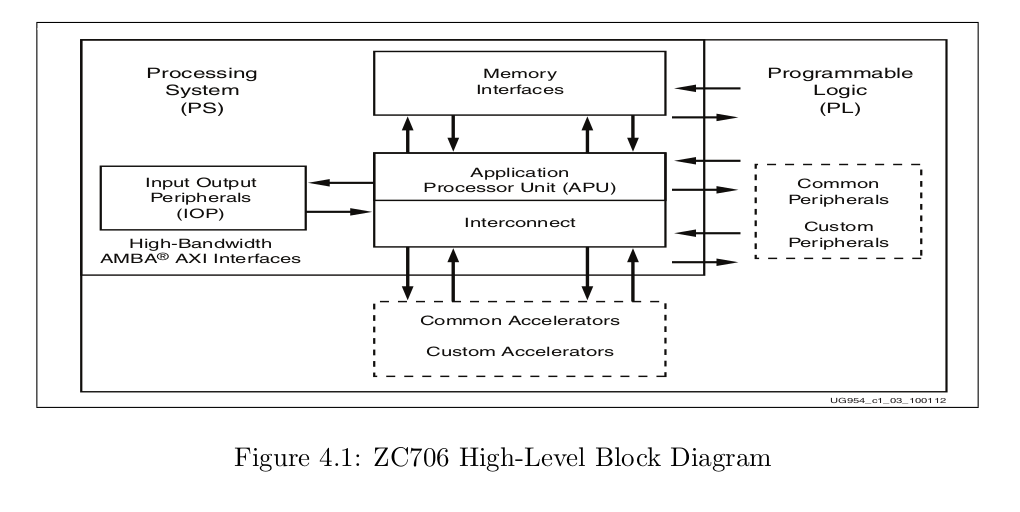

The PS integrates two ARM®Cortex™-A9 MPCore™application processors UART, GPIO etc. The PS runs independently of the PL and boots at power-up or reset.

The programmable logic side in the XC7Z045 equivalent to a Kintex-7 FPGA, containing 350K Logic Cells, 218,600 Look-Up Tables (LUTS), 437,200 Flip-Flops, 19.1Mb Total Block RAM, 00 DSP Slices.
In this experiment, we program the PS in C language and program the PL in verilog language. [2]
        
**a. Hardware setup**

Assemble the lab as shown in Figure 4.2 The board is connected to the GPSboard is used as EVG. The other board is used as EVR.



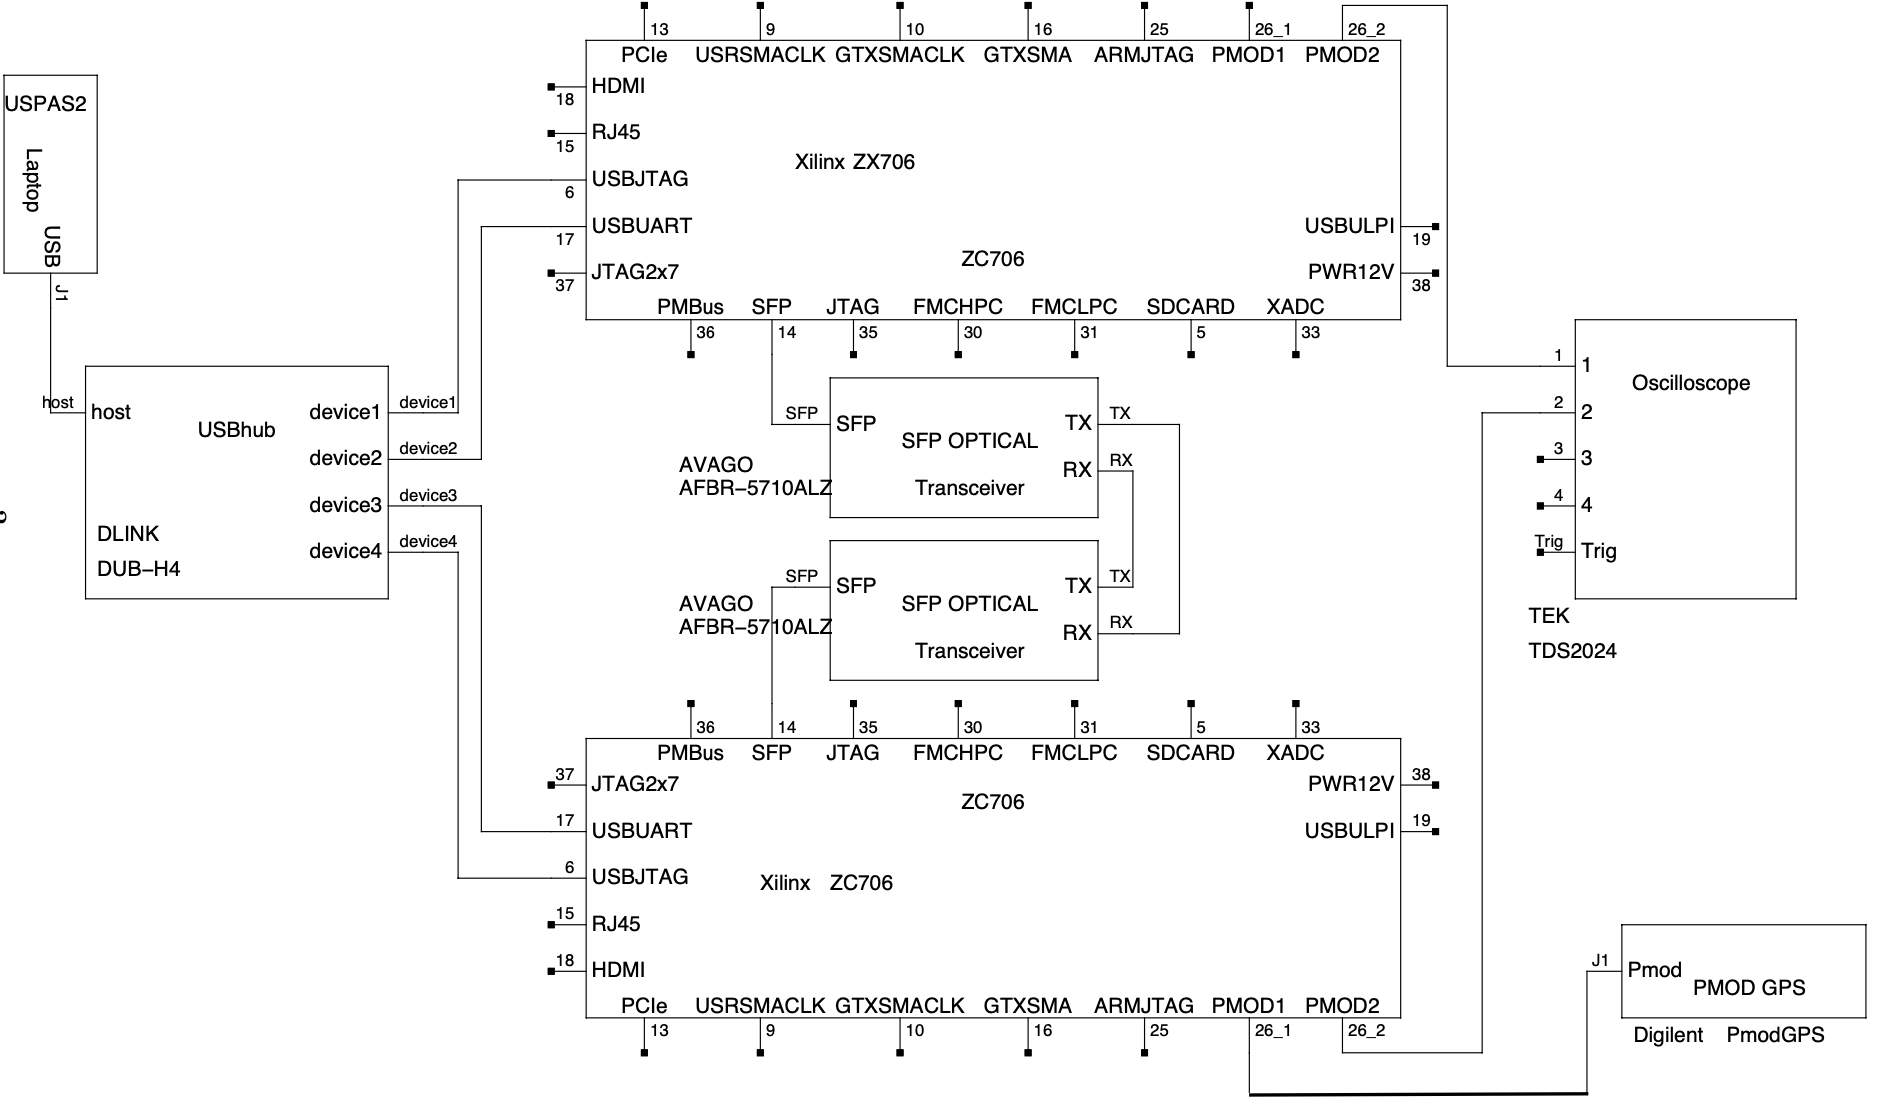
Fig. 2 Hardware setup



**b. Software setup**

The software for this lab are in the sdk src directory. They communicate with the computer via UART port. We can use screen command to interface with the serial port.

Start a new terminal. Locate the usbserial port and connect it by screen command	

        ls /dev/ttyUSB*
        screen /dev/ttyUSB0 115200

Open another terminal and connect to the other USB serial port
        
        screen /dev/ttyUSB1 115200

**c. Firmware setup**

    i. We have made empty directory for each group. Go to your group directory by
        
        cd
        cd g4/group?

    ii. Clone the source code of the tinyEvg/evr from
        
        git clone http://gitlab.lbl.gov/ghuang/tinyevgevr.git
    
    iii. Synthesis and implement the FPGA bit file by the script
        
        cd tinyevgevr
        Make
            
    iv. While waiting for the computer synthesis the code, load the pre-synthesised bit file to the hardware by going to uspas/uspas. Keep an eye on the make progress of the previous step and when it finished successfully, load the bitfile you synthesised to the hardware.
		
        cd ˜/uspas/tinyevgevr
    
    v. Disconnect the JTAG cable EVR,Connected the JTAG cable to EVG.
        
        make tinyEvgrun

    vi. Disconnect the JTAG cable EVG,Connected the JTAG cable to EVR.

        make tinyEvrrun

**d. Relative jitter**

Observe the EVR / EVG pulse per second signal on scope. If the Keysight scope available, measure the relative jitter between them.

**e. Monitor the debug message**

In each terminal, type

        debug 1

to start monitor the debug message. And
        
        debug 0
to stop the debug message.

**f. Understand the build process**

Use vivado gui open the tinyEVG.xpr; 

Check the source files Hierarchy.

    vivado tinyEVG/tinyEVG.xpr

**g. View the xsdk source code**

Open the Xilinx SDK project in the tinyEVG/tinyEVG.sdk, 

Check that with the script generate it tinyEvgsdk.tcl.

        xsdk tinyEVG/tinyEVG.sdk

**h. Write your own module**

Add a new module yourself to implement some new functionality.

- Option 1: Blink a user LED.
- Option 2: Measure the system clock drift on the EVR board using the distributed pulse per second.
- Option 3: Add a new event. Distribute from EVG and receive by EVR to output a series of trigger signal.

##    4. References
[[1]]() Xilinx. Zc706 evaluation board for the zynq-7000 xc7z045 all programmable soc user guide.

[[2]]() Xilinx. Zynq-7000 all programmable soc family product tables and product selection guide.